<a href="https://colab.research.google.com/github/yecatstevir/teambrainiac/blob/main/source/group_svm/Explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Voxel Distribution 
## Starting with Adolescent
- We will look at the voxel distribution at time point 45 for all plots
- Using different normalization applications:
  - Compare the first 5 subjects for run # 2
  - Compare all runs for the first subject

- Explore Young Adult

## Connect to Gdrive, Clone Repository, Load config files to access data, and import packages and modules

In [ ]:
from google.colab import drive, files
drive.mount('/content/gdrive')#, force_remount = True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/yecatstevir/teambrainiac.git
# Change directory into cloned repo
%cd teambrainiac/source/group_svm
!ls


fatal: destination path 'teambrainiac' already exists and is not an empty directory.
/content/teambrainiac/source
Access_Load_Data.ipynb		  models
All_subject_masked_labeled.ipynb  path_config.py
cross_validation.py		  percent_signal_change.ipynb
data				  process.py
explore.py			  __pycache__
Images				  SVM_Group_Child_Whole_Brain.ipynb
__init__.py			  SVM_Group_YA_Whole_brain.ipynb
Masking.ipynb			  utils.py
Mat_to_Numpy.ipynb		  Visualize_Data.ipynb


In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving path_config.py to path_config (1).py
User uploaded file "path_config.py" with length 228 bytes


In [ ]:
# Import libraries
!pip install boto3 nilearn

from utils import *
from explore import *
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


## Access and load Unnormalized fMRI data

In [ ]:
%%time
#pkl_file = "whole_brain_all_norm_2d.pkl" # normalized by psc
pkl_file = 'all_data_dictionary.pkl' #Unnormalized
bool_mat = False
data = access_load_data(pkl_file, bool_mat)

CPU times: user 29 s, sys: 43.6 s, total: 1min 12s
Wall time: 1min 7s


In [ ]:
#open path dictionary file to get subject ids
path = "data/data_path_dictionary.pkl"
data_path_dict = open_pickle(path)
subject_ids = data_path_dict['subject_ID']

# Split dataset into young children and older children/young adults
child = subject_ids[:33]
teen_plus = subject_ids[33:]
print("Number of subjects for child and teens", len(child), len(teen_plus))

Number of subjects for child and teens 33 19


## Plot Distribution of first 5 subjects on Unnormalized data for Adolescent (Child)

not running PSC_ZNORM or ZNROM ALONE...
not running PSC_ZNORM or ZNROM ALONE...
not running PSC_ZNORM or ZNROM ALONE...
not running PSC_ZNORM or ZNROM ALONE...
not running PSC_ZNORM or ZNROM ALONE...
sample 5 subject set size:  (5, 237979)


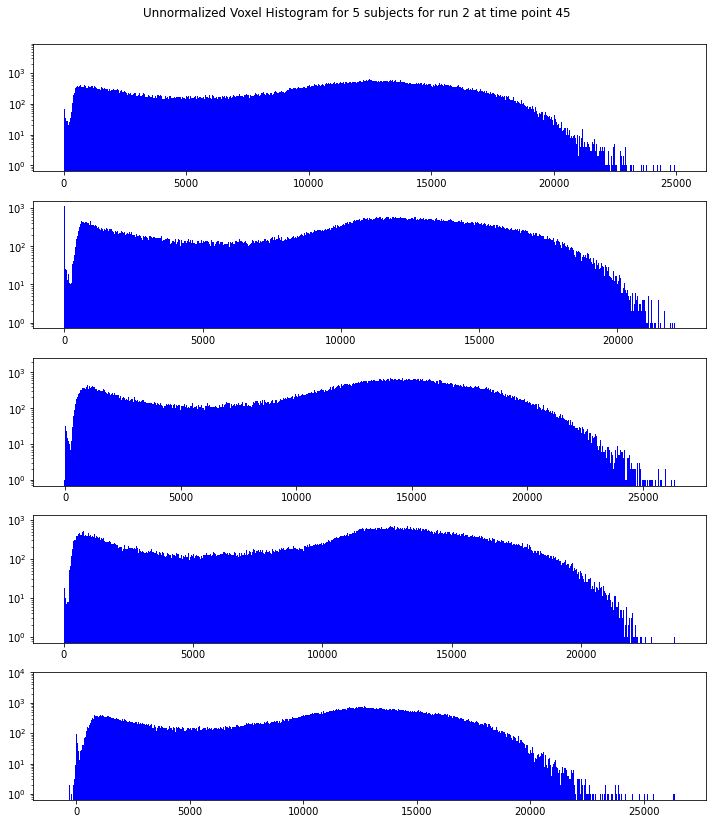

In [ ]:
n_sub = 5
run = 1
num_bins = 1000
sub_ids = child
data_norm = "Unnormalized" # PSC_ZNORM, Z-Normalized, Unnormalized, Percent Signal Change


plot_dist_across_subjects(data, run, num_bins, sub_ids, data_norm, n_sub)


## Plot distribution of first 4 runs of first subject on Unnormalized Data for Adolescent (Child)

Not running PSC ZNORM...


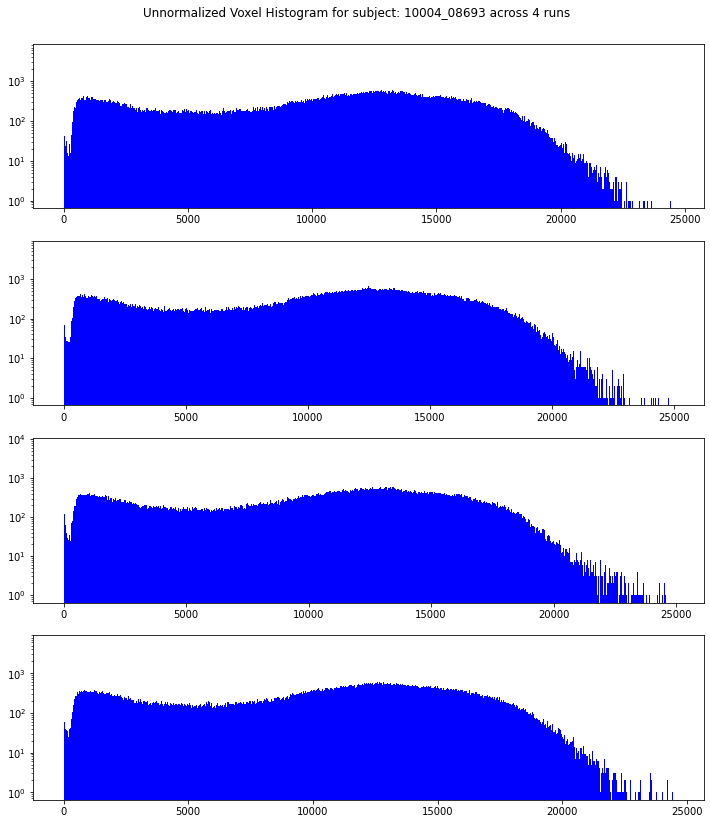

In [ ]:
plot_dist_first_subject(data, num_bins, data_norm)

We can see that our data is not fitting a normal distribution so let's see how applying other types of normalization look on Adolscent Data

## Plot Distribution of first 5 subjects on data for Adolescent (Child) by applying Z-score Normalization

Running Z-Normalized...
Running Z-Normalized...
Running Z-Normalized...
Running Z-Normalized...
Running Z-Normalized...
sample 5 subject set size:  (5, 237979)


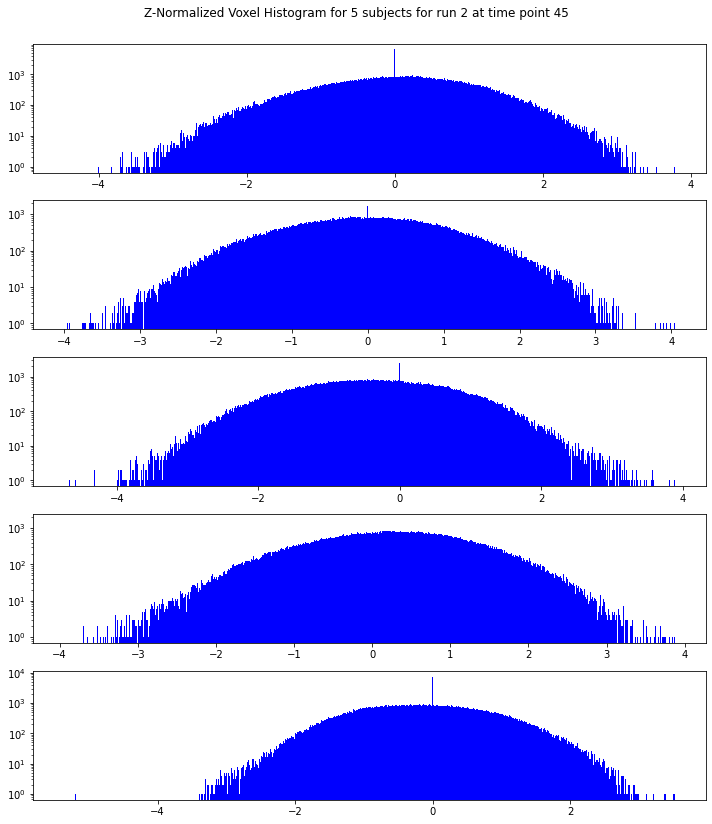

In [ ]:
data_norm = "Z-Normalized" # PSC_ZNORM, Z-Normalized, Unnormalized, Percent Signal Change
plot_dist_across_subjects(data, run, num_bins, sub_ids, data_norm, n_sub)

## Plot distribution of first 4 runs of first subject on Adolescent (Child) by applying Z-score Normalization

Running Z-Normalized...


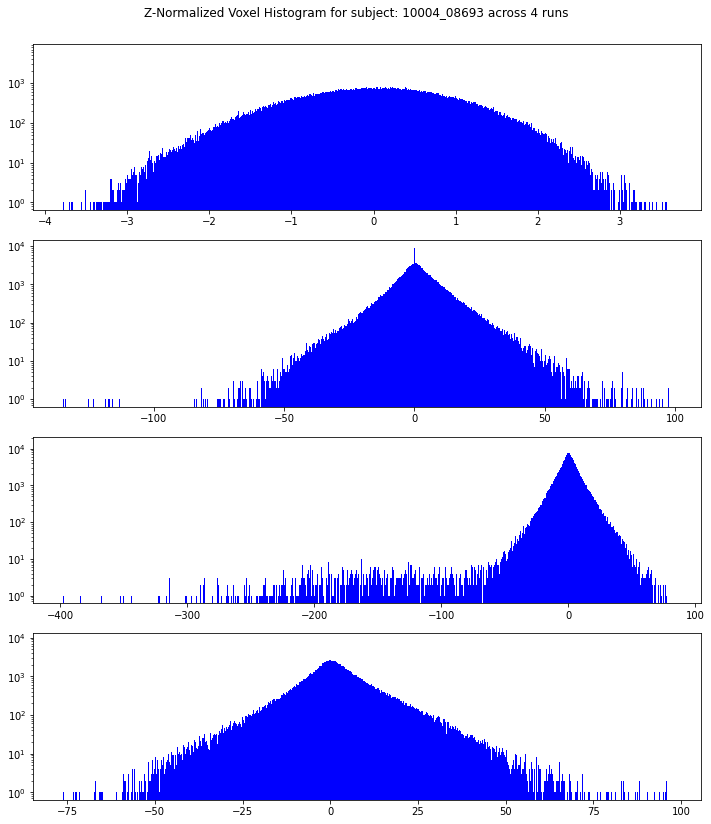

In [ ]:
plot_dist_first_subject(data, num_bins, data_norm)

It appears that normalizing per subject per run looks closer to a normal distribution than normalizing across all runs for a single subject.  Let's explore this further by looking at our data that has been normalized by Percent Signal Change. 

## Access and load data where percent signal change has already been applied

In [ ]:
%%time
pkl_file = "whole_brain_all_norm_2d.pkl" # normalized by psc
#pkl_file = 'all_data_dictionary.pkl' #Unnormalized
bool_mat = False
data = access_load_data(pkl_file, bool_mat)

CPU times: user 1min 15s, sys: 1min 50s, total: 3min 6s
Wall time: 2min 45s


## Plot Distribution of first 5 subjects on data for Adolescent (Child) that has been normalized by Percent Signal Change

not running PSC_ZNORM or ZNROM ALONE...
not running PSC_ZNORM or ZNROM ALONE...
not running PSC_ZNORM or ZNROM ALONE...
not running PSC_ZNORM or ZNROM ALONE...
not running PSC_ZNORM or ZNROM ALONE...
sample 5 subject set size:  (5, 237979)


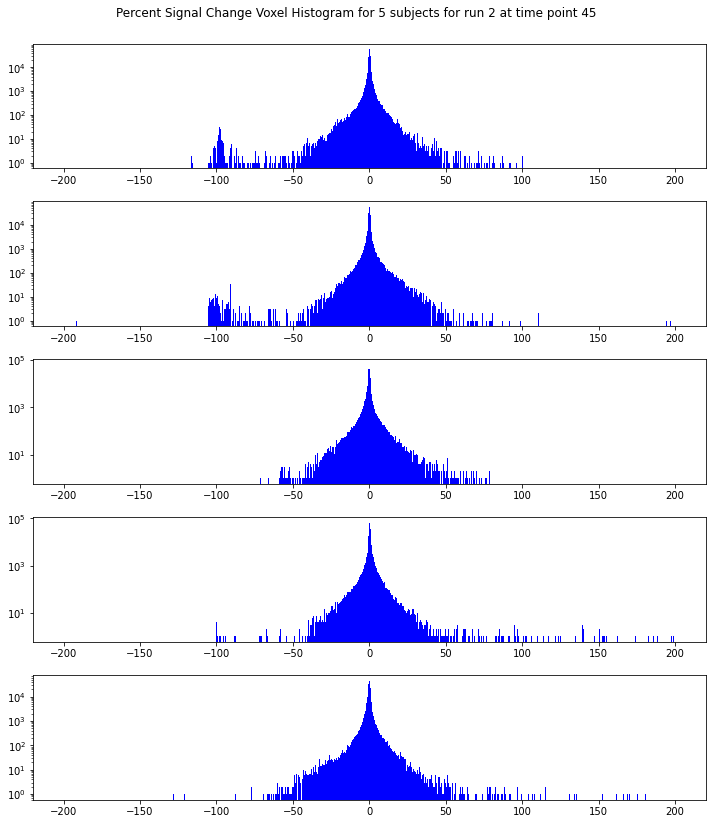

In [ ]:
data_norm = "Percent Signal Change" # PSC_ZNORM, Z-Normalized, Unnormalized, Percent Signal Change
plot_dist_across_subjects(data, run, num_bins, sub_ids, data_norm, n_sub)

## Plot Distribution of first 4 runs of first subject on Adolescent (Child) data that has been normalized by Percent Signal Change

Not running PSC ZNORM...


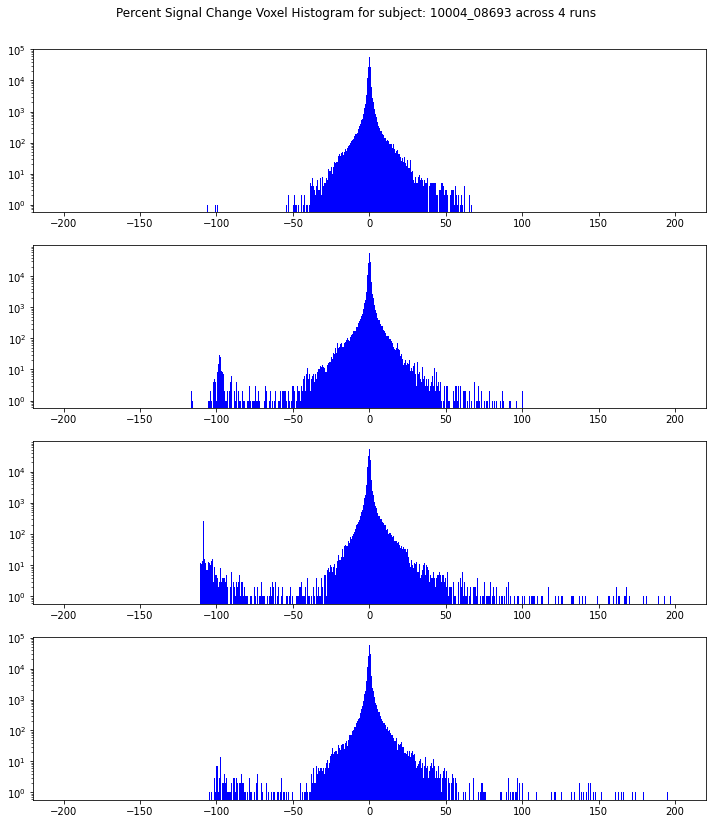

In [ ]:
plot_dist_first_subject(data, num_bins, data_norm)

We can see there is still some noise with applying percent signal change. Let's try applying z-score normalization on top of our percent signal changed data!

## Plot Distribution of first 5 subjects on data for Adolescent (Child) 
- normalized by Percent Signal Change
- Z-score scaling applied to each run/subject separately

Running PSC_ZNORM...
Running PSC_ZNORM...
Running PSC_ZNORM...
Running PSC_ZNORM...
Running PSC_ZNORM...
sample 5 subject set size:  (5, 237979)


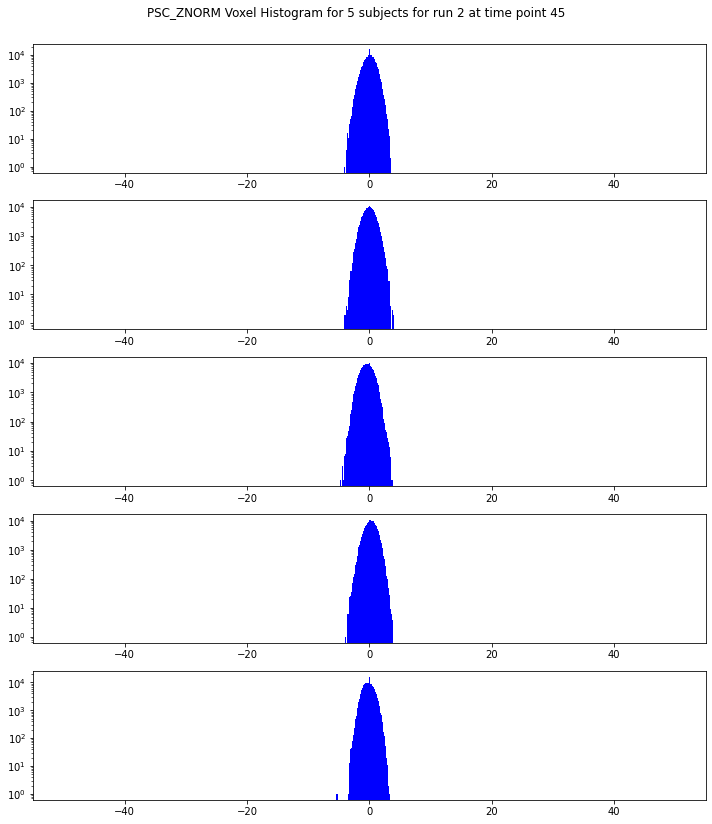

In [ ]:
data_norm = "PSC_ZNORM" # PSC_ZNORM, Z-Normalized, Unnormalized, Percent Signal Change
plot_dist_across_subjects(data, run, num_bins, sub_ids, data_norm, n_sub)

## Plot Distribution of first 4 runs of first subject on Adolescent (Child) data 
- normalized by Percent Signal Change
- Z-score scaling applied to all runs together for one subject

Running PSC_ZNORM...


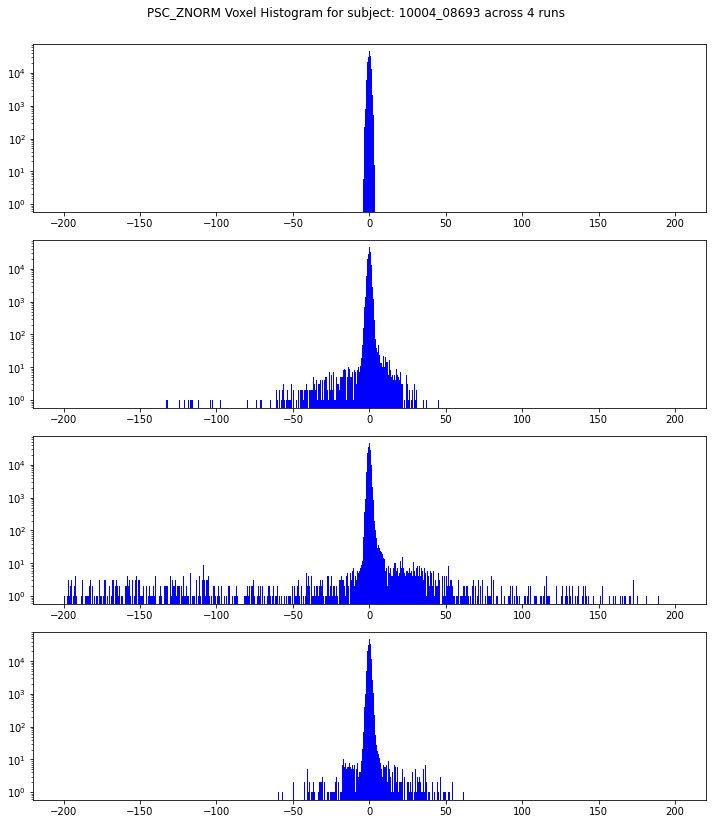

In [ ]:
plot_dist_first_subject(data, num_bins, data_norm)

It looks like Z-score Normalization applied to Percent Signal Change data separately for each subject/run yields a more clear and narrow looking distribution.

## Takaways:
- Z-score normalization appears to work per subject, per run for our data
- Applying Z-score normalization to unnormalized data or data that has been also normalized by percent signal change yields very similar distributions. **NOTE: The Z-norm with PSC graph across subjects is plotted in a range from (-50, 50) whereas, the unnormalized data Z-normalized does not have range restriction and therefore, the plot scales differently. When plotted without range restriction, Z-norm with PSC looks nearly identical to the Z-normalization only data.** 
- We can use these distribution graphs to help make decisions on how to normalize our data in preparation for SVM and Deep Learning analyses